***Хотим пятерку, а на деле***

Кластеризуйте данный датасет с помощью метода `k-means`. На основе трёх различных __внутренних__ метрик оценки кластеризации, подберите наилучшее количество кластеров $k$.


n = 2
Silhouette:  0.65488803407687
Calinski-Harabasz:  937.653713448297
Davies-Bouldin:  0.499190438864389
n = 3
Silhouette:  0.608014408720123
Calinski-Harabasz:  933.8894745017769
Davies-Bouldin:  0.5865838263501708
n = 4
Silhouette:  0.5655809768447313
Calinski-Harabasz:  965.1957885515358
Davies-Bouldin:  0.6040669513324276
n = 5
Silhouette:  0.6163373649682039
Calinski-Harabasz:  1533.2393672714004
Davies-Bouldin:  0.5392636615443334
n = 6
Silhouette:  0.5662465927635822
Calinski-Harabasz:  1346.8161557998278
Davies-Bouldin:  0.6656092759485998
n = 7
Silhouette:  0.506670669032491
Calinski-Harabasz:  1225.7952648658088
Davies-Bouldin:  0.8278489610455395
n = 8
Silhouette:  0.48039085738897325
Calinski-Harabasz:  1159.1635445032869
Davies-Bouldin:  0.8243152962935416
n = 9
Silhouette:  0.3837150223773761
Calinski-Harabasz:  1102.5594250866945
Davies-Bouldin:  0.9713044383689415

The best number (Silhouette): 2
The best number (Calinski-Harabasz): 5
The best number (Davies-Bouldin)

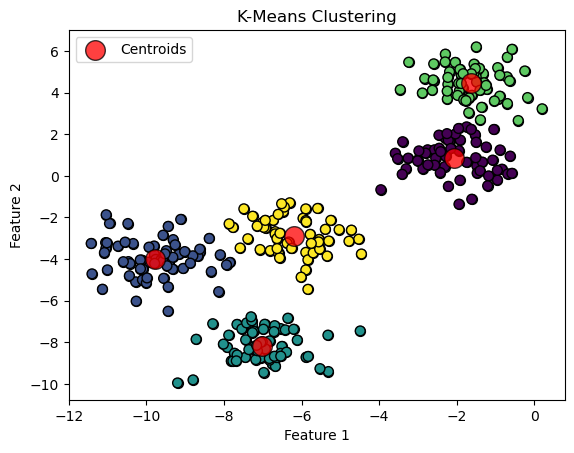

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score



X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')

max_sil = 0
m_sil = 2
max_cal = 0
m_cal = 2
max_dav = 0
m_dav = 2


for i in range(2, 10):
  kmeans = KMeans(n_clusters=i, n_init = 'auto')
  kmeans.fit(X)
  y_kmeans = kmeans.predict(X)
  if max_sil < silhouette_score(X, y_kmeans):
    max_sil = silhouette_score(X, y_kmeans)
    m_sil = i
  if max_cal < calinski_harabasz_score(X, y_kmeans):
    max_cal = calinski_harabasz_score(X, y_kmeans)
    m_cal = i
  if max_dav < davies_bouldin_score(X, y_kmeans):
    max_dav = davies_bouldin_score(X, y_kmeans)
    m_dav = i
  print('n =', i)
  print('Silhouette: ', silhouette_score(X, y_kmeans))
  print('Calinski-Harabasz: ', calinski_harabasz_score(X, y_kmeans))
  print('Davies-Bouldin: ', davies_bouldin_score(X, y_kmeans))

print('\nThe best number (Silhouette):', m_sil)
print('The best number (Calinski-Harabasz):', m_cal)
print('The best number (Davies-Bouldin):', m_dav)

# Вывод
kmeans = KMeans(n_clusters=5, n_init = 'auto') 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroids', edgecolor='k')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

***Повторение - мать ученья***

Для предыдущего датасета подберите наилучшие гиперпараметры (мера несходства) с использованием агломеративного метода. Постройте дендрограмму для наилучшей модели.

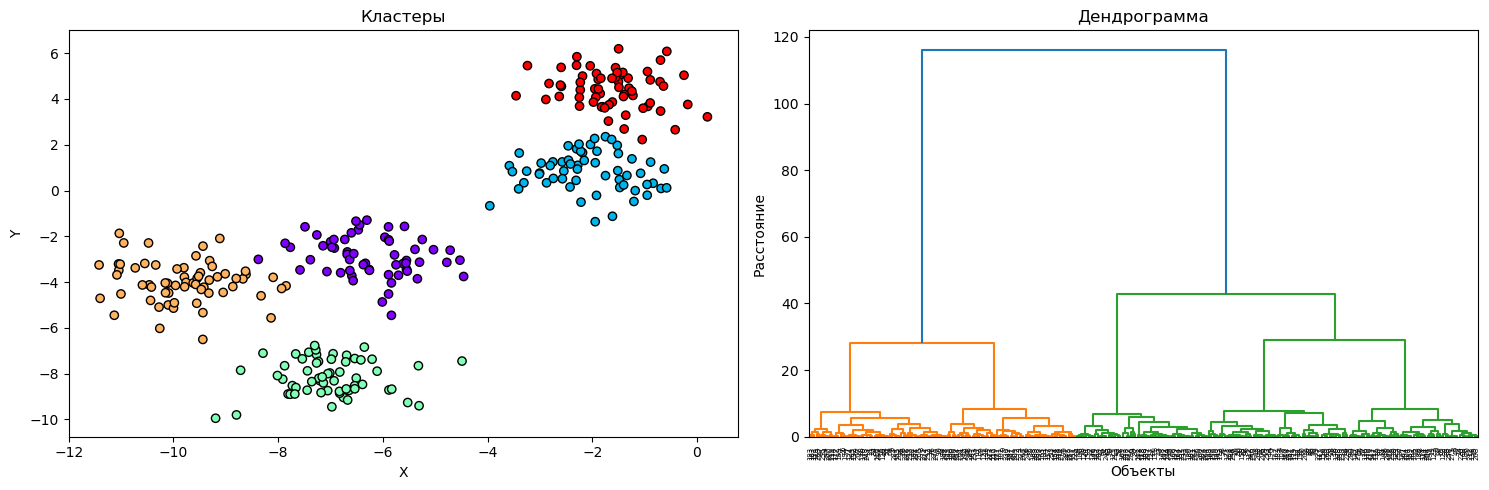

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Генерация данных
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)

# Агломеративная кластеризация
agglom_clustering = AgglomerativeClustering(n_clusters=5,
                                            linkage = 'ward') # n_clusters - где обрезать дендрограмму
clusters = agglom_clustering.fit_predict(X)

# Ссылка
Z = linkage(X, method='ward')

# Создание субплотов
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Левый субплот с кластерами
axs[0].scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow', edgecolor='k')
axs[0].set_title('Кластеры')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# Правый субплот с дендрограммой
dendrogram(Z, ax=axs[1])
axs[1].set_title('Дендрограмма')
axs[1].set_xlabel('Объекты')
axs[1].set_ylabel('Расстояние')

plt.tight_layout()
plt.show()

***Матрица расстояний (смежности) и матрица сходств***

Расстояния между парами векторов из двух множеств $d\left(X_l, X_j\right)$ могут быть представлены в виде симметричной матрицы расстояний (матрица смежности):

$$
D=\left(\begin{array}{cccc}
0 & d_{12} & \ldots & d_{1 n} \\
d_{21} & 0 & \ldots & d_{2n} \\
\ldots & \ldots & \ldots & \ldots \\
d_{n 1} & d_{n 2} & \ldots & 0
\end{array}\right)
$$

Понятием, противоположным расстоянию, является понятие сходства между объектами. Неотрицательная вещественная функция $S\left(x_i , x_j\right)=S_{i j}$ называется __мерой сходства__, если:


1) $0 \leq S\left(x_i, x_j\right)<1$ для $x_i \neq x_j$

2) $S\left(x_i, x_i\right)=1$

3) $S\left(x_i, x_j\right)=S\left(x_j, x_i\right)$

Пары значений мер сходства можно объединить в __матрицу сходства__:

$$
S=\left(\begin{array}{cccc}
1 & s_{12} & \ldots & s_{1 n} \\
s_{21} & 1 & \ldots & s_{2 n} \\
s_{n 1} &  s_{n 2} & \ldots & 1
\end{array}\right)
$$

Величину $S_{i j}$ называют __коэффициентом сходства__.

Постройте матрицу смежности по датасету первой задачи, взяв в качестве меры расстояния евклидову метрику.

Постройте на основе неё какую-нибудь матрицу сходства (вам надо самим придумать функцию сходства - просто удовлетвроите трём свойствам).

Визуализируйте обе матрицы в виде картинки. Используйте imshow() или pcolormesh() из Matplotlib.

Для получения матриц используйте функцию  [sklearn.metrics.pairwise_distances ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances) (тут можно в качестве метрики использовать свою собственную функцию - так можно сделать матрицу сходств) или какую-то другую отсюда https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

Можно также посмотреть здесь https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors , например, функцию neighbors.[kneighbors_graph](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html#sklearn.neighbors.kneighbors_graph)

Матрица смежности


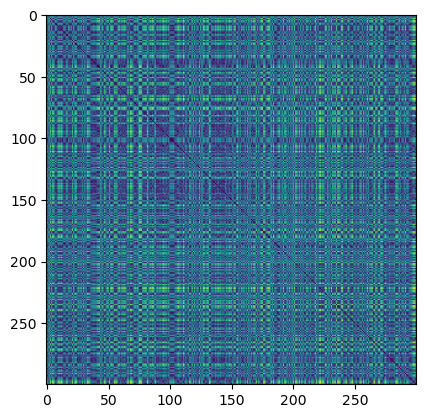

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

# Генерация данных
A = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)
x = A[0]
M1 = pairwise_distances(x)
M2 = np.ones([300,300])-M1
print('Матрица смежности')
plt.imshow(M1)

Матрица сходства


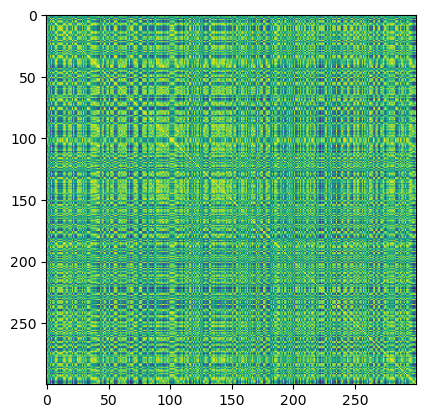

In [12]:
print('Матрица сходства')
plt.imshow(M2,label='Матрица сходства')

***Игрушечные галактики***

Следующий датасет содержит координаты в 3д некоторого набора галактик. Необходимо найти скопления этих самых галактик с помощью алгоритма `hdbscan` - смеси обычного dbscan и иерархического подхода. Точная формулировка задачи после кода.

Вам понадобится файл toy_galaxies.csv из гугл диска.

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
!pip install hdbscan
import hdbscan
from sklearn.metrics import adjusted_rand_score as ari
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, AgglomerativeClustering


data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/toy_galaxies (2).csv") # Не забудьте скачать файл
display(data.head(3))

# Отобразим датасет
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, data.x,data.y,data.z, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 835.7 kB/s eta 0:00:0000:0100:01


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/toy_galaxies (2).csv'